<a href="https://colab.research.google.com/github/cerdanflor/Burbuja/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans



In [10]:
caso=pd.read_csv("https://raw.githubusercontent.com/VictorGuevaraP/ME-Machine-Learning/master/publicidad.csv", sep=";")


In [12]:
caso.head()



,Ventas,Television,Radio,Periodico
0,22.1,230.1,37.8,19
1,10.4,44.5,39.3,13
2,9.3,17.2,45.9,23
3,18.5,151.5,41.3,8
4,12.9,180.8,10.8,2


In [13]:
caso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ventas      200 non-null    float64
 1   Television  200 non-null    float64
 2   Radio       200 non-null    float64
 3   Periodico   200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [14]:
caso.describe()

,Ventas,Television,Radio,Periodico
count,200.000000,200.000000,200.000000,200.000000
mean,14.022500,147.042500,23.264000,7.195000
std,5.217457,85.854236,14.846809,5.783096
min,1.600000,0.700000,0.000000,0.000000
25%,10.375000,74.375000,9.975000,2.000000
50%,12.900000,149.750000,22.900000,6.000000
75%,17.400000,218.825000,36.525000,11.000000
max,27.000000,296.400000,49.600000,25.000000


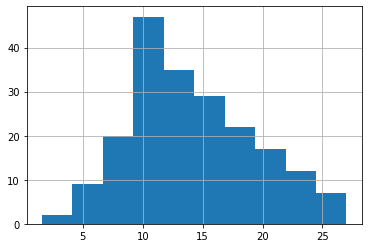

In [17]:
caso.Ventas.hist();

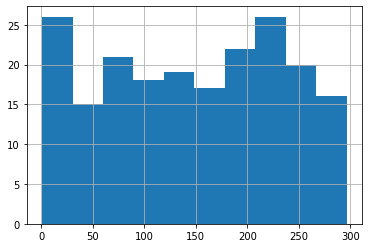

In [18]:
caso.Television.hist();

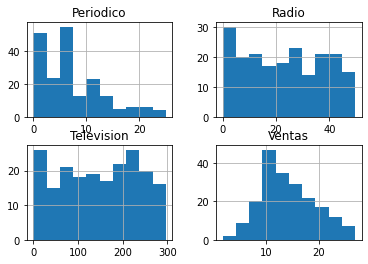

In [19]:
caso.hist();

In [20]:
caso.corr()

,Ventas,Television,Radio,Periodico
Ventas,1.000000,0.782224,0.576223,0.441561
Television,0.782224,1.000000,0.054809,0.030144
Radio,0.576223,0.054809,1.000000,0.800217
Periodico,0.441561,0.030144,0.800217,1.000000


In [21]:
caso.cov()

,Ventas,Television,Radio,Periodico
Ventas,27.221853,350.390195,44.635688,13.323229
Television,350.390195,7370.949893,69.862492,14.966545
Radio,44.635688,69.862492,220.427743,68.707055
Periodico,13.323229,14.966545,68.707055,33.444196


In [31]:
#Escalar la data
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [32]:
caso_escalado=scaler.fit_transform(caso)

In [36]:
caso_escalado=pd.DataFrame(caso_escalado)

In [37]:
caso_escalado.head()

,0,1,2,3
0,1.552053,0.969852,0.981522,2.046417
1,-0.696046,-1.197376,1.082808,1.006307
2,-0.907406,-1.516155,1.528463,2.739823
3,0.860330,0.052050,1.217855,0.139548
4,-0.215683,0.394182,-0.841614,-0.900562


In [38]:
caso_escalado.describe()

,0,1,2,3
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-2.148975e-16,1.104672e-16,-4.413137e-16,-7.216450e-17
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-2.386924e+00,-1.708823e+00,-1.570868e+00,-1.247265e+00
25%,-7.008497e-01,-8.485295e-01,-8.973206e-01,-9.005620e-01
50%,-2.156830e-01,3.161515e-02,-2.457858e-02,-2.071553e-01
75%,6.489705e-01,8.381955e-01,8.954299e-01,6.596032e-01
max,2.493565e+00,1.744029e+00,1.778300e+00,3.086527e+00


In [40]:
caso_escalado2=(caso-caso.min())/(caso.max()-caso.min())


In [41]:
caso_escalado2.head()


,Ventas,Television,Radio,Periodico
0,0.807087,0.775786,0.762097,0.76
1,0.346457,0.148123,0.792339,0.52
2,0.303150,0.055800,0.925403,0.92
3,0.665354,0.509976,0.832661,0.32
4,0.444882,0.609063,0.217742,0.08


In [43]:
from sklearn.cluster import KMeans

In [49]:
funcion=KMeans(n_clusters=3, init='k-means++')
funcion2=KMeans(n_clusters=3, init='k-means++')


In [50]:
funcion.fit(caso_escalado)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
funcion2.fit(caso_escalado2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
funcion.inertia_


316.78651130051225

In [53]:
funcion2.inertia_


21.11541476295242

In [56]:
#Método del codo para saber la cantidad optima de cluster
SSE=[]
for cluster in range(1,20):
  grupo1=KMeans(n_jobs=-1,n_clusters=cluster, init='k-means++')
  grupo1.fit(caso_escalado2)
  SSE.append(grupo1.inertia_)


In [62]:
import matplotlib.pyplot as plt
 

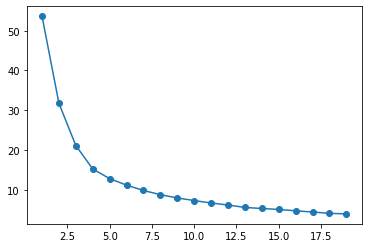

In [63]:
caso_codo=pd.DataFrame({'cluster':range(1,20), 'SSE': SSE})
plt.plot(caso_codo['cluster'],caso_codo['SSE'], marker='o');


Text(0, 0.5, 'Inertia')

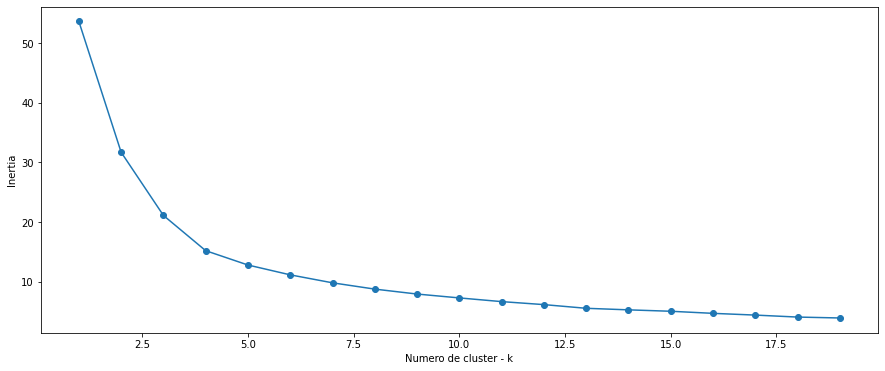

In [64]:
caso_codo=pd.DataFrame({'cluster':range(1,20), 'SSE': SSE})
plt.figure(figsize=(15,6))
plt.plot(caso_codo['cluster'],caso_codo['SSE'], marker='o');
plt.xlabel('Numero de cluster - k')
plt.ylabel('Inertia')


In [65]:
#Según el metodo del codo sugiere que se debería generar 4 grupos
funcion_final=KMeans( n_clusters=4, init='k-means++')



In [66]:
funcion_final.fit(caso_escalado2)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
funcion_final.inertia_

15.201246162308056

In [77]:
pred=funcion_final.predict(caso_escalado2)


In [78]:
caso_final=pd.DataFrame(caso_escalado2)


In [83]:
caso_final['cluster']=pred


In [84]:
caso_final.head()




                      

,Ventas,Television,Radio,Periodico,cluster
0,0.807087,0.775786,0.762097,0.76,1
1,0.346457,0.148123,0.792339,0.52,2
2,0.303150,0.055800,0.925403,0.92,2
3,0.665354,0.509976,0.832661,0.32,1
4,0.444882,0.609063,0.217742,0.08,3


In [85]:
caso_final.head(20)

,Ventas,Television,Radio,Periodico,cluster
0,0.807087,0.775786,0.762097,0.76,1
1,0.346457,0.148123,0.792339,0.52,2
2,0.303150,0.055800,0.925403,0.92,2
3,0.665354,0.509976,0.832661,0.32,1
4,0.444882,0.609063,0.217742,0.08,3
5,0.220472,0.027054,0.985887,0.48,2
6,0.401575,0.192087,0.661290,0.28,2
7,0.456693,0.404126,0.395161,0.40,2
8,0.125984,0.026716,0.042339,0.04,0
9,0.354331,0.673318,0.052419,0.04,3


In [86]:
caso_final['cluster'].value_counts()

3    54
1    54
0    49
2    43
Name: cluster, dtype: int64